In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv("annex1.csv")

numeric_df = df.select_dtypes(include=['int64', 'float64'])



In [3]:
df = pd.read_csv("annex1.csv")
df.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [4]:
print("Shape:", df.shape)

# Data info
df.info()

# Summary statistics
df.describe(include="all")

Shape: (251, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


,Item Code,Item Name,Category Code,Category Name
count,2.510000e+02,251,2.510000e+02,251
unique,NaN,247,NaN,6
top,NaN,Chinese Cabbage,NaN,Flower/Leaf Vegetables
freq,NaN,2,NaN,100
mean,1.031908e+14,NaN,1.011010e+09,NaN
std,1.048400e+12,NaN,2.915469e+02,NaN
min,1.029000e+14,NaN,1.011010e+09,NaN
25%,1.029000e+14,NaN,1.011010e+09,NaN
50%,1.029000e+14,NaN,1.011011e+09,NaN
75%,1.029000e+14,NaN,1.011011e+09,NaN


In [5]:
df.isnull().sum()

,0
Item Code,0
Item Name,0
Category Code,0
Category Name,0


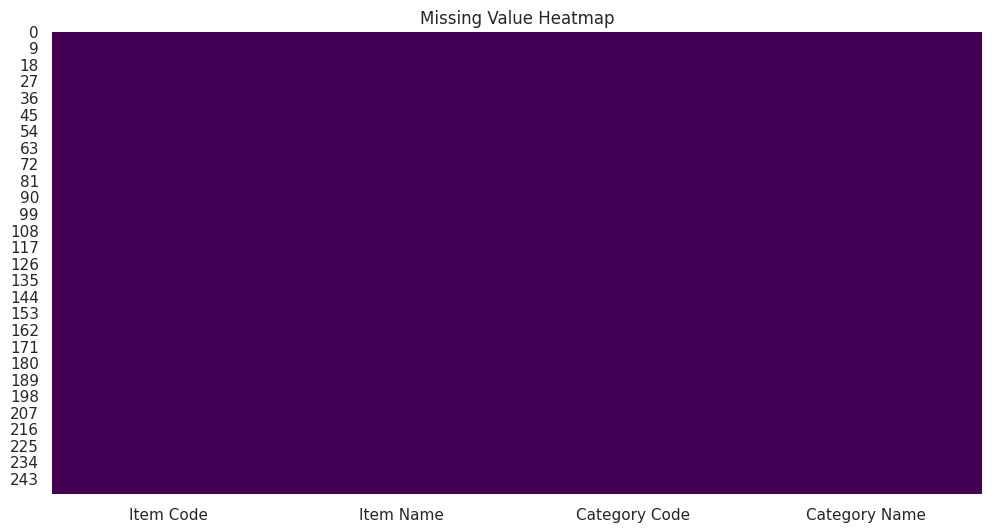

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [7]:
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Item Name
Item Name
Chinese Cabbage                                 2
Broccoli                                        2
Apricot Bao Mushroom (Bag)                      2
Chinese Caterpillar Fungus Flowers (Bag)        2
Amaranth                                        1
                                               ..
Haixian Mushroom (Bag) (4)                      1
Haixian Mushroom (Bunch)                        1
Haixian Mushroom (Bag) (3)                      1
Chinese Caterpillar Fungus Flowers (Box) (2)    1
Hfyg Haixian Mushroom (Bunch)                   1
Name: count, Length: 247, dtype: int64

Column: Category Name
Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64


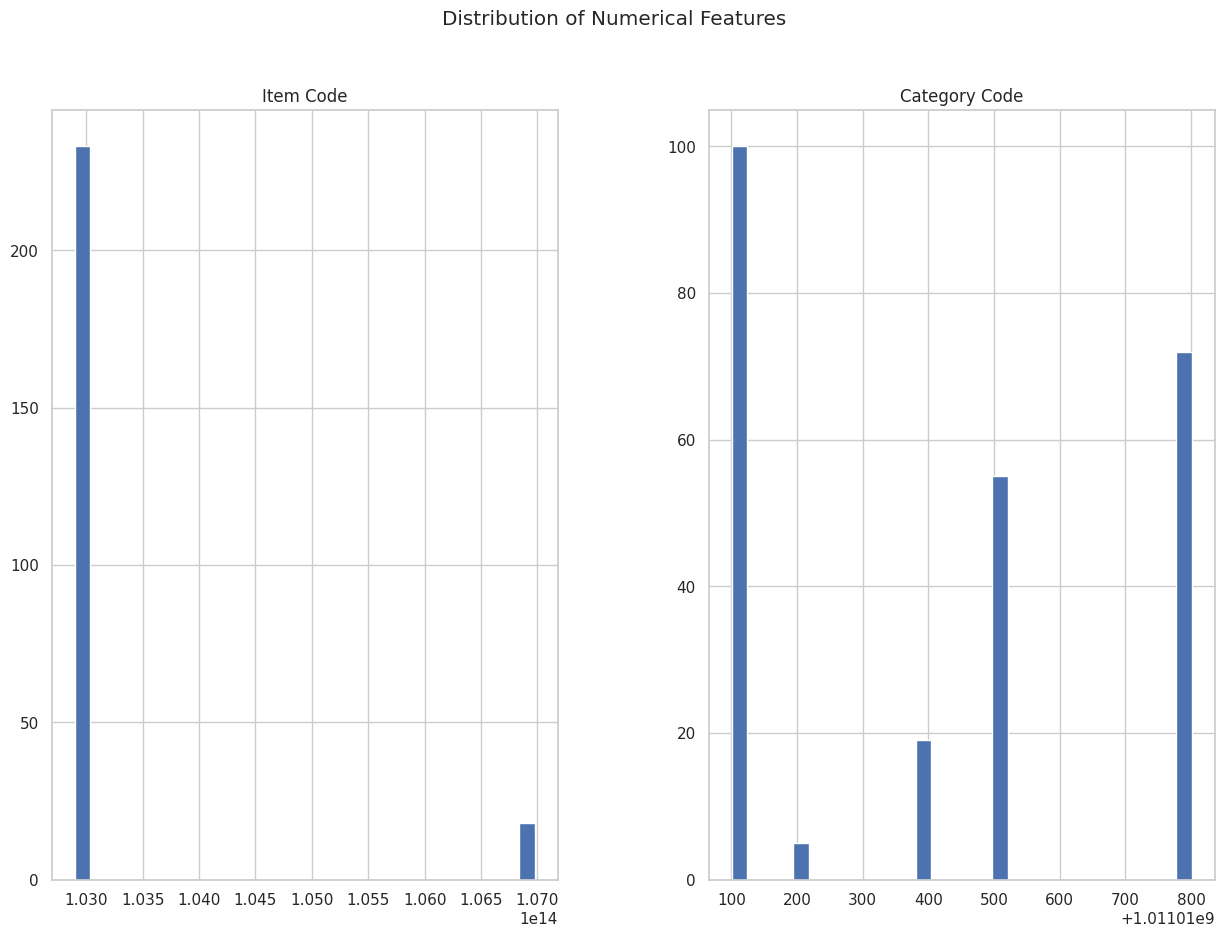

In [8]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

numeric_df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

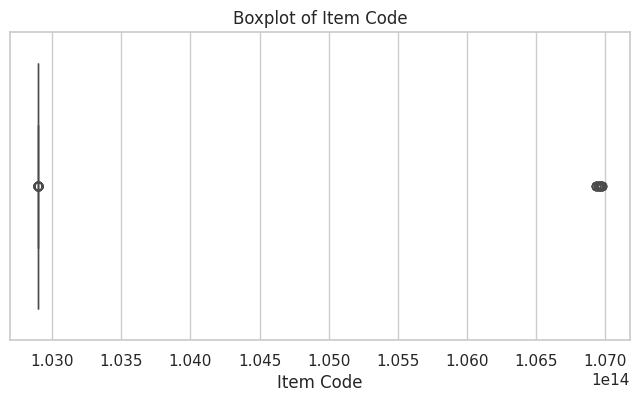

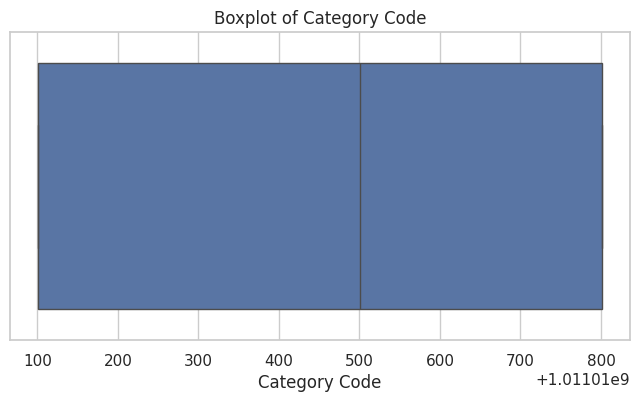

In [9]:
for col in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

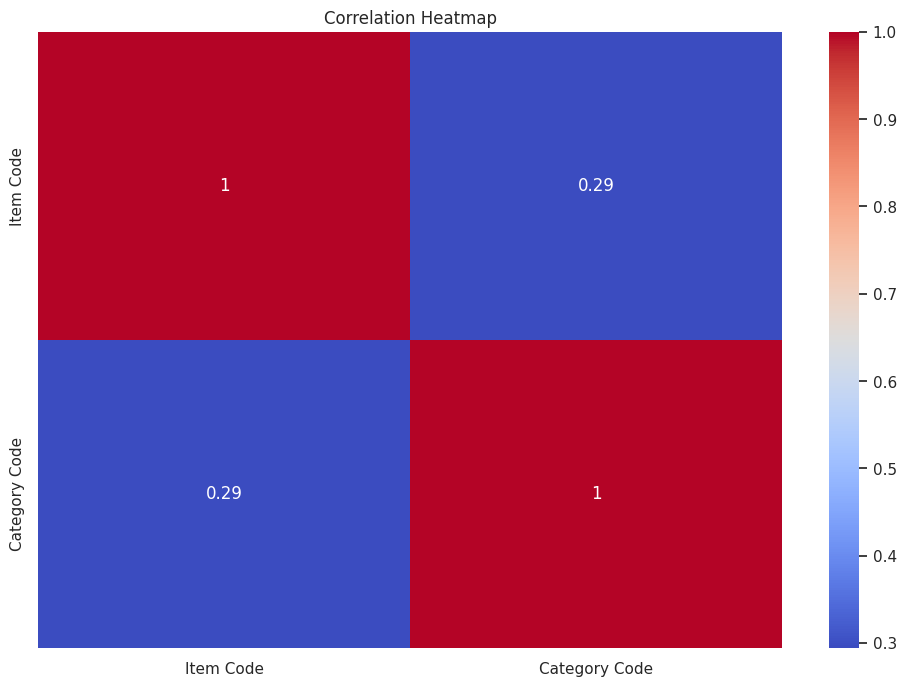

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
group_col = df.select_dtypes(include="object").columns[0]

df.groupby(group_col)[numeric_df.columns].mean()

,Item Code,Category Code
Item Name,,
7 Colour Pepper (1),1.029000e+14,1.011011e+09
7 Colour Pepper (2),1.029000e+14,1.011011e+09
7 Colour Pepper (Bag),1.029000e+14,1.011011e+09
Agaricus Bisporus (Bag),1.029000e+14,1.011011e+09
Agaricus Bisporus (Box),1.029000e+14,1.011011e+09
...,...,...
Zhijiang Red Bolt,1.029000e+14,1.011010e+09
Zhijiang Red Bolt (Bag),1.029000e+14,1.011010e+09
Zhimaxiancai,1.029000e+14,1.011010e+09


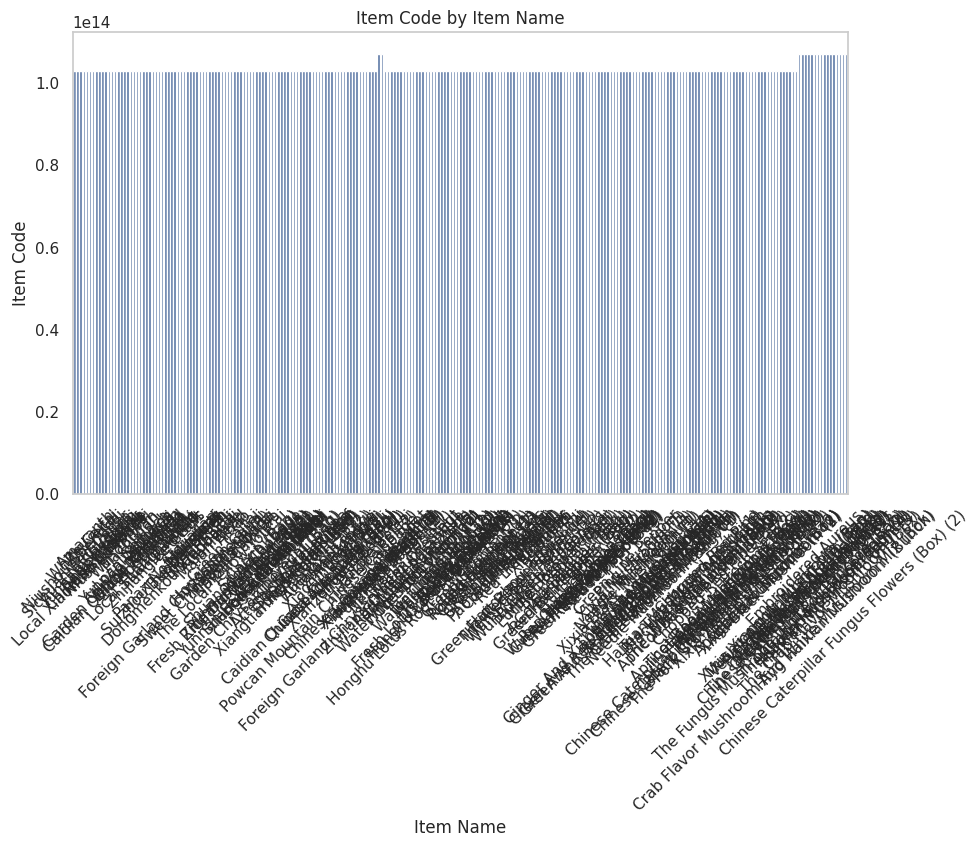

In [12]:
sns.barplot(x=group_col, y=numeric_df.columns[0], data=df)
plt.xticks(rotation=45)
plt.title(f"{numeric_df.columns[0]} by {group_col}")
plt.show()


In [13]:
skew_vals = numeric_df.skew()
print("Skewness of Variables:\n", skew_vals)
skewed_cols = skew_vals[skew_vals > 1].index

for col in skewed_cols:
    df[col+"_log"] = np.log1p(df[col])

df.head()


Skewness of Variables:
 Item Code        3.339977
Category Code    0.170723
dtype: float64


,Item Code,Item Name,Category Code,Category Name,Item Code_log
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,32.264779
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables,32.264779
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables,32.264779
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables,32.264779
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables,32.264779
